# Аналитика данных с помощью pandas и matplotlib

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.

Минимальные баллы для зачёта по этой работе - 3 балла. Если вы не набираете тут 3 балла, то по всему курсу вы получаете неуд<br> (см. слайды с семинара №1)

 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация по matplotlib](https://matplotlib.org/index.html)

## 1. Данные (2 балла)

Начнем с необходимых приготовлений.

In [105]:
import numpy as np
import pandas as pd
import matplotlib as mpl  
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла "coins.csv". Создайте объект типа pandas.DataFrame с именем coins и в качестве индекса выберите колонку с датой.

In [106]:
coins = pd.read_csv('coins.csv', index_col='date')

Посмотрим что получилось

In [107]:
coins.head(4)

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

#### Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):
#### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [108]:
coins['name'].nunique()  # Количество разных монет

70

#### 2. За какой период данные мы имеем? (0.4 балла)

In [109]:
print(coins.index.max(), coins.index.min())  # Период

2018-06-06 2013-04-28


#### 3. Есть ли пропуски в данных? Какой природы эти пропуски? (0.5 балла)

In [110]:
coins.isna().sum()  # Посчитаем количество NaN в каждом столбце

price               327
txCount            1520
txVolume           1830
activeAddresses    1520
symbol                0
name                  0
open                  0
high                  0
low                   0
close                 0
volume                0
market                0
dtype: int64

#### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [111]:
coins[coins['price'] == coins['price'].max()][['price', 'name']]  # самая дорогая монета

,price,name
date,,
2017-12-17,19475.8,Bitcoin


#### 5. У какой монеты самая высокая и самая низкая суммарная капитализация? Постройте круговую диаграмму с долями. (0.5 балла)

In [123]:
data = coins.loc[coins.index.max()]

In [124]:
graph = data[(data['market'] == data['market'].max()) | (data['market'] == data['market'].min())][['market', 'name']]

In [125]:
graph.loc[3] = [data['market'].sum() - graph['market'].sum(), 'others'] # Добавим сумму капитализаций остальных монет

In [126]:
graph

,market,name
date,,
2018-06-06,1.302330e+11,Bitcoin
2018-06-06,1.841400e+04,KingN Coin
3,1.503490e+11,others


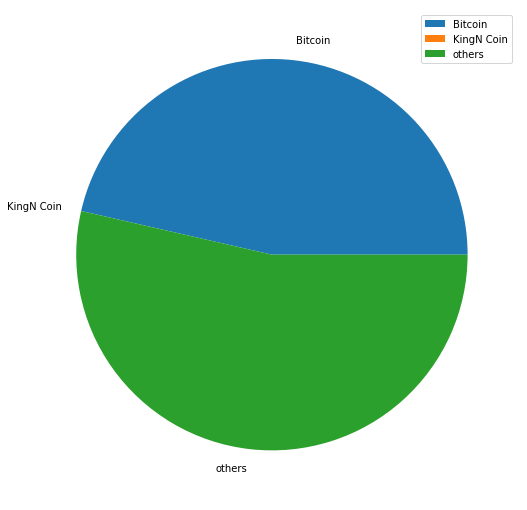

In [127]:
plt.figure(figsize=(16, 9))
plt.pie(graph['market'], labels=graph['name'])
plt.legend(graph['name'], loc='best')
plt.show()

## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

#### Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.
На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать matplotlib.finance.candlestick_ohlc (mpl_finance.candlestick_ohlc), но можно и без него.

In [128]:
def plot_fancy_price_action(coins, symbol, start_date, end_date):
    data = coins.loc[start_date:end_date:]
    data = data[data['symbol'] == symbol]
    
    fig = plt.figure(figsize=(16, 9))
    
    values = ['open', 'close', 'high', 'low']
    
    ax = fig.add_axes([0, 0, 1, 1])
    ax.grid(True)
    
    for name in values:
        ax.plot(data.index, data[name])
        
    ax.set_xticks(data.index.values[::data.shape[0] // 15])
    
    ax.set_title(symbol, fontsize=30)
    ax.set_xlabel('DATE', fontsize=24)
    ax.set_ylabel('PRICE', fontsize=24)
    ax.legend(values, loc='best')
    
    plt.show()

Посмотрим, что получилось:

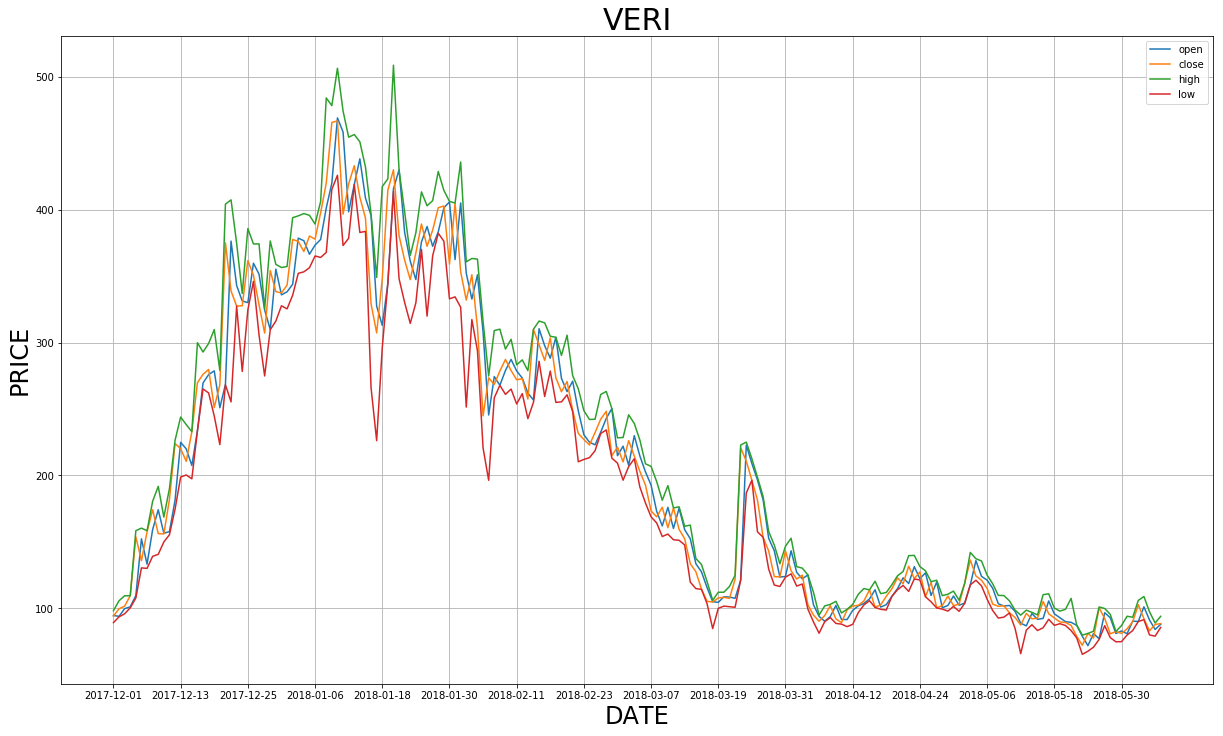

In [129]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2017-12-01', end_date='2018-06-30') 

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)
Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - pump'n'dump (накачка и сброс). Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются
вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде
успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

#### Ваша задача найти самый сильный pump'n'dump монеты на заданном промежутке времени. Для этого для каждого дня определим число pnd равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день когда pnd был максимален и величину pnd.

In [28]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    data = coins[coins['symbol'] == symbol].loc[start_date:end_date]
    max_price = (data['open'] > data['close']) * data['open'] + (data['open'] <= data['close']) * data['close']
    
    pnd = data['high'] / max_price
    
    
    return pnd.max(), pnd.idxmax()

In [29]:
print(find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01'))

(1.1428940004366206, '2017-11-29')


#### Сравните эти значения для разных монет.

In [30]:
for coin in set(coins['symbol']):
    ans = find_most_severe_pump_and_dump(coins, symbol=coin, start_date='2017-06-01', end_date='2018-06-01')
    print(coin, ' ', *ans)

NAS   1.1758241758241759 2017-11-17
LRC   4.528409090909091 2017-09-23
KNC   1.8519240136385777 2017-09-19
QASH   1.6658378856041134 2017-11-23
MANA   2.9702777900454884 2017-09-21
ICN   2.5863373829914362 2017-12-07
LTC   1.1082257158899496 2018-02-07
ADA   1.29064039408867 2017-10-01
DGB   1.359942799461642 2017-12-17
LOOM   1.5265126623868976 2018-03-14
PIVX   1.3587962962962963 2017-11-28
FUN   12.490562327959102 2017-06-29
NEO   1.232142857142857 2017-06-10
OMG   1.3312148056585635 2017-07-14
ZIL   1.46318577374196 2018-03-05
XLM   1.3325105113251052 2017-10-16
GNT   1.6882121234525307 2018-04-13
ZEC   1.3298776561493881 2017-09-28
VTC   1.3952095808383234 2017-10-22
DCR   1.8054444587795122 2018-04-25
REP   1.477601285025879 2018-05-11
LSK   1.4424778761061947 2017-06-07
GNO   1.653659748974773 2018-03-25
ANT   1.7336683417085428 2017-10-13
ENG   1.3618677042801557 2017-12-25
MTL   1.6728538283062646 2017-11-20
ETHOS   1.3698404867620457 2017-08-05
DOGE   1.2747326203208555 2017-

## 4. Окупаемость инвестиций (1 балл)

#### Вам нужно посчитать окупаемость инвестиций в криптовалюты на заданном промежутке времени. Окупаемость определяется как отношение изменения цены портфеля к исходной цене портфеля. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.
investments - dict в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD)

In [130]:
def compute_roi(coins, investments, start_date, end_date): # Переписать
    
    
    start_sum = 0
    end_sum = 0
    
    for coin in investments.keys():
        start_sum += coins[coins['symbol'] == coin].loc[start_date]['price'] * investments[coin]
        end_sum += coins[coins['symbol'] == coin].loc[end_date]['price'] * investments[coin]
    
    print(end_sum / start_sum)

In [131]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

1.004831614576722


In [132]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

58.53575236064575


## 5. Технический анализ (1 балл)

Технический анализ это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - границы Болинджера. Кто-то верит, что график касаясь границы от него должен отражаться.

#### Нарисуйте график цены, скользящее среднее и [границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands) c параметрами N (window) = 21, K (width) = 2.

Границы считаются очень просто: (MA + Kσ) и (MA - Kσ), где MA - скользящее среднее за N дней, а σ - скользящее стандартное отклонение за N дней.

Тут вам поможет функция rolling для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [133]:
def plot_bollinger_bands(coins, symbol, window, width):
    data = coins[coins['symbol'] == symbol]['open']
    
    means = data.rolling(window).mean()
    deviations = data.rolling(window).std()
    
    fig = plt.figure(figsize=(16, 9), facecolor='azure', dpi=250)
    
    ax = fig.add_axes([0, 0, 1, 1])
    ax.plot(data.index, data, linewidth=2)
    ax.plot(data.index, means + deviations * width, linestyle='--', color='lightcoral')
    ax.plot(data.index, means - deviations * width, linestyle='--', color='maroon')
    
    ax.set_ylabel('Price $', fontsize=22)
    ax.set_xlabel('Date', fontsize=22)
    ax.set_title('Bollinger Bands', fontsize=30)
    
    ax.legend(('open price', 'top border', 'bottom border'), loc='best')
    
    ax.set_xticks(data.index.values[::data.shape[0] // 15])
    plt.show

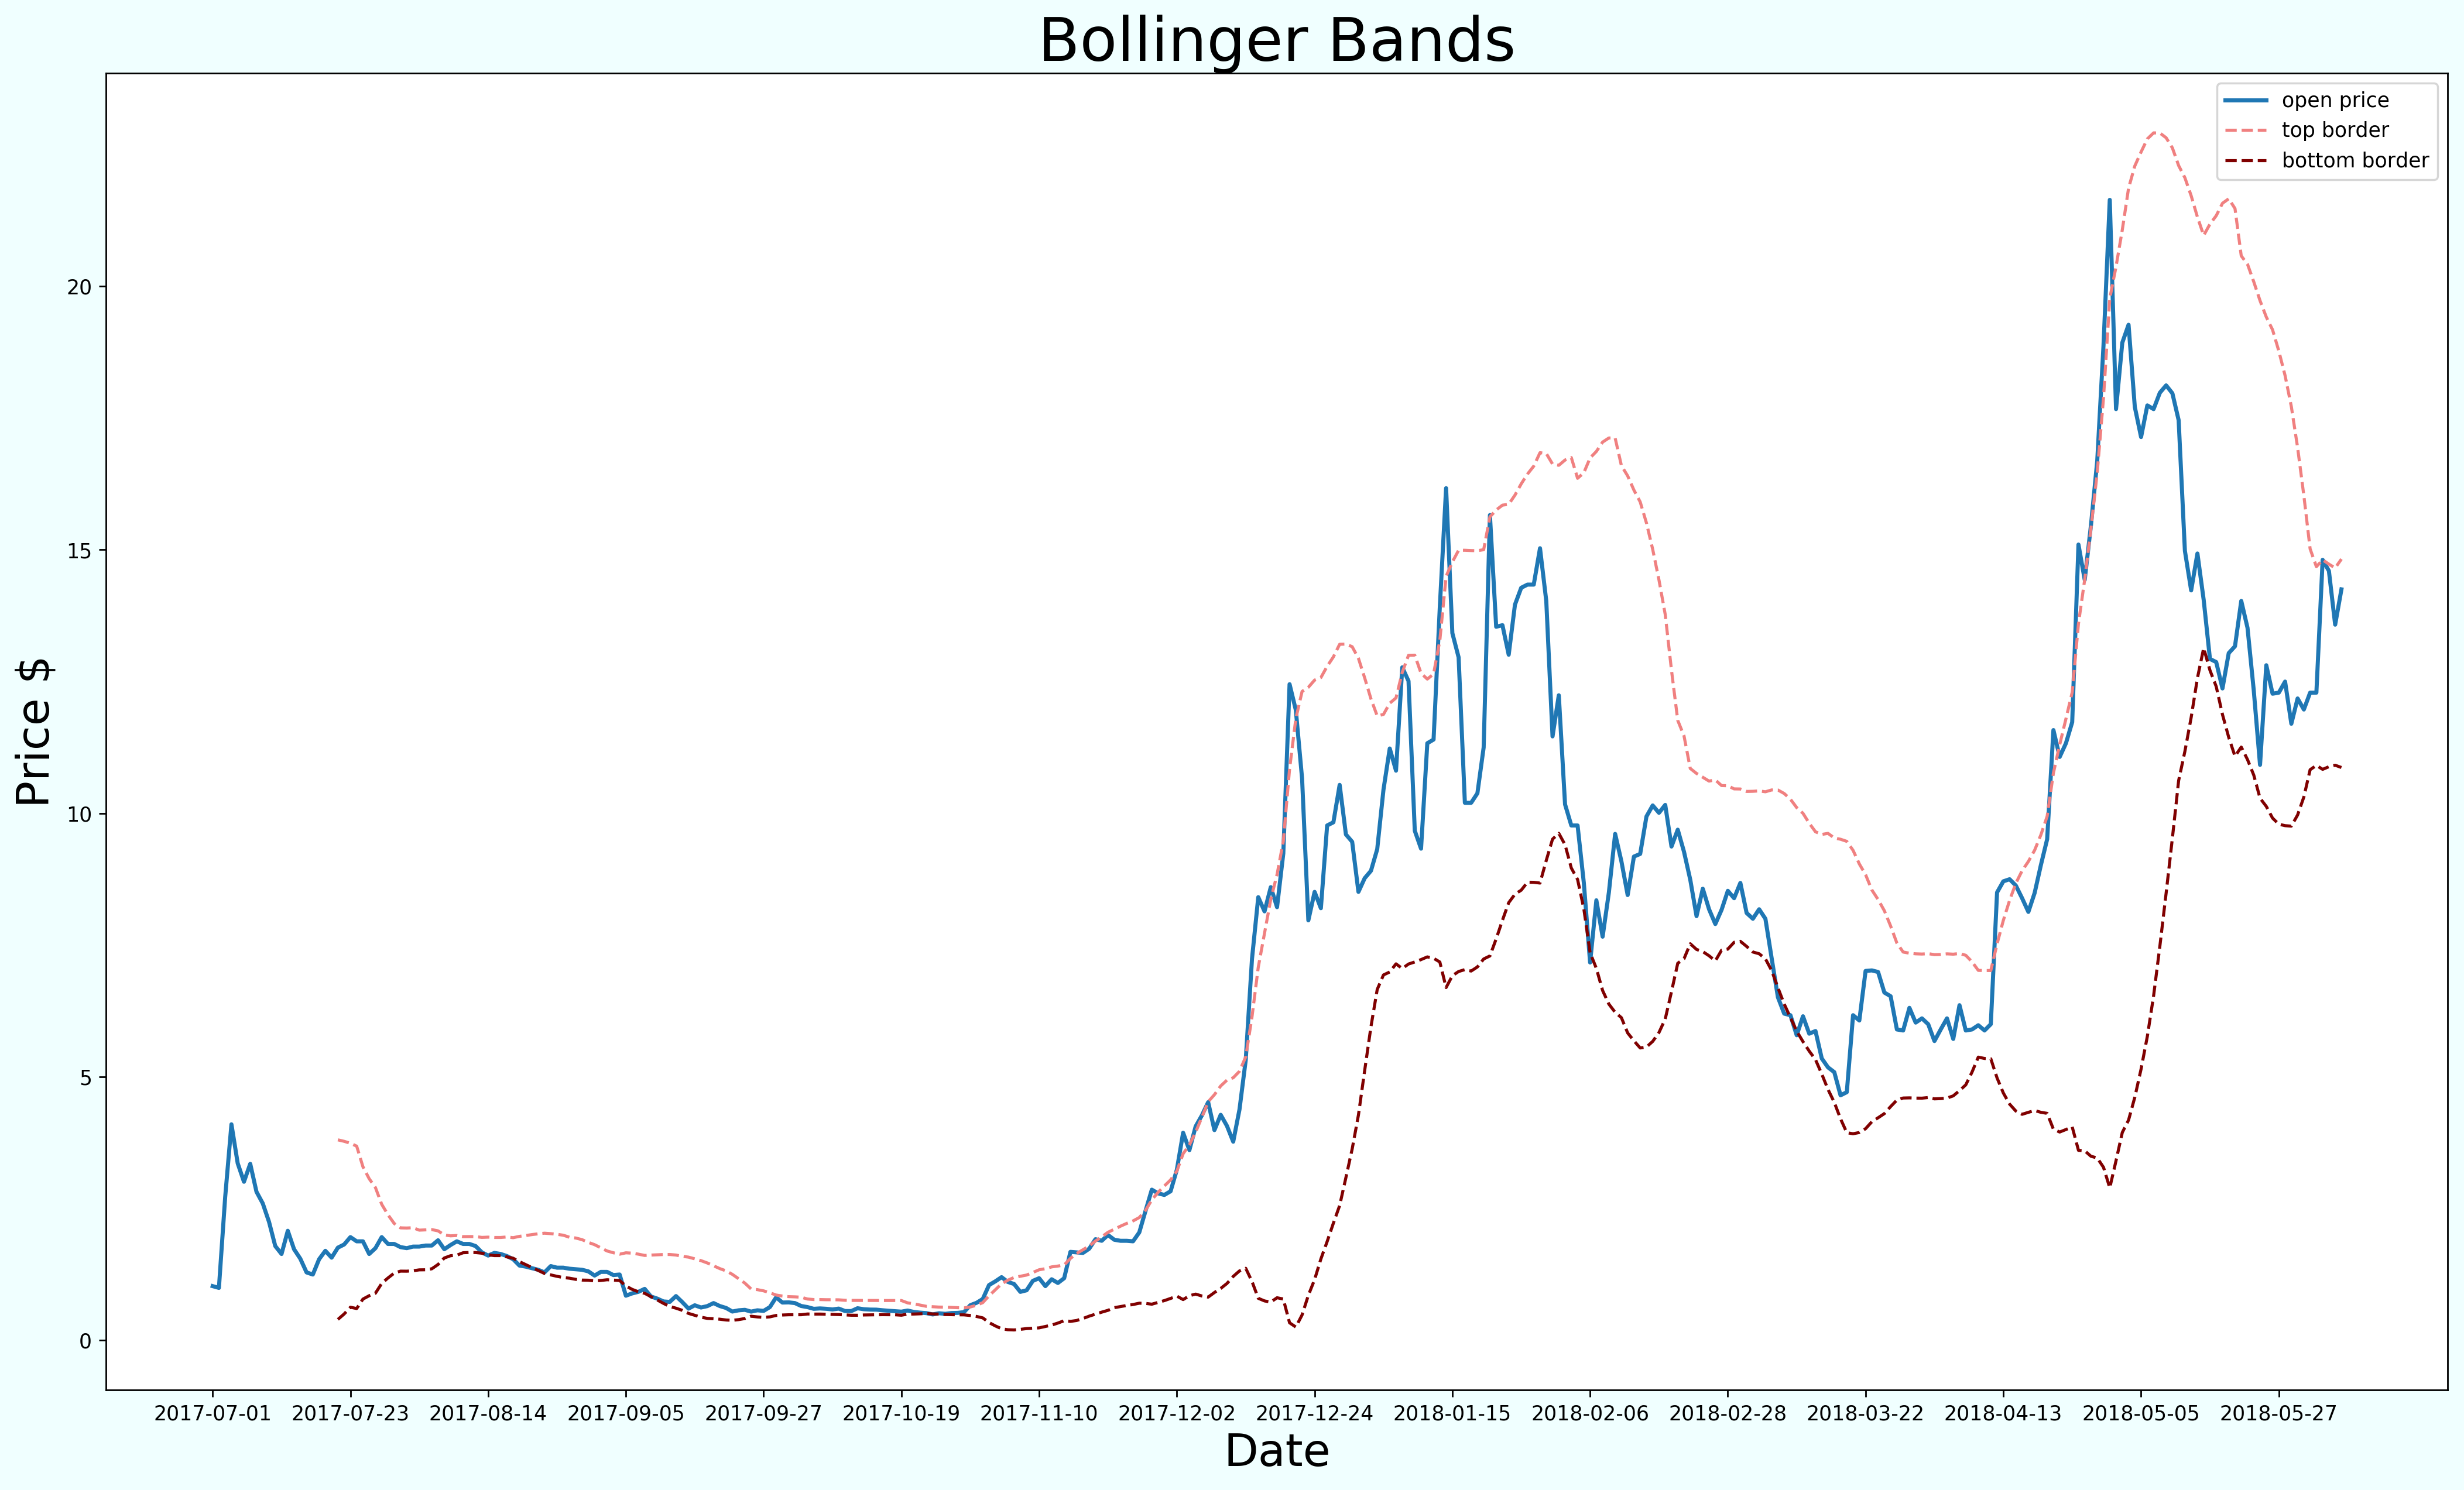

In [134]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

#### Сделайте вывод о том, выполнялось ли правило Боллинджера.

Правило выполнено не всегда. Например, биткоин касался границы графика несколько раз в период сильного роста и не отражался (примерно с 2018-04-00)

## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на капитализацию. Давайте поймём почему.

#### Нарисуйте еще два графика. На первом должна быть общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC). На втором - доли капитализаций этих монет от общей капитализации рынка. При этом используйте данные начиная с 2017-07-01.

In [135]:
def plot_coins_capitalizations(coins, symbols, start_date):
    fig = plt.figure(figsize=(16, 18))
    data = coins.loc[start_date:]
    sorted_index = sorted(set(data.index))
    
    frequency = len(sorted_index) // 10
    
    # Первый график
    ax = fig.add_subplot(2, 1, 1)
    ax.set_title('Market cap', fontsize=20)
    
    for coin in symbols:
        support = pd.DataFrame(index=sorted_index, columns=data.columns)
        
        for i in data[data['symbol'] == coin].index: 
            support.loc[i]['market'] = data[data['symbol'] == coin]['market'].loc[i]
        
        ax.plot(sorted_index, support['market'])
    
    ax.legend(symbols)
    
    ax.set_xticks(sorted_index[::frequency])
    
    ax.set_ylabel('Capitalization', fontsize=15)
        
    # Второй график
    az = fig.add_subplot(2, 1, 2)
    az.set_title('Ratio', fontsize=20)
    
    total = pd.DataFrame(index=sorted_index, columns=['market'])
    
    for date in sorted_index:  # Посчитаем суммарную капитализацию по дням
        total.loc[date] = coins.loc[date]['market'].sum()
        
    for coin in symbols:
        az.plot(sorted_index, data[data['symbol'] == coin]['market'] / total['market'])
    
    az.legend(symbols)
    
    az.set_xticks(sorted_index[::frequency])
    
    plt.show()

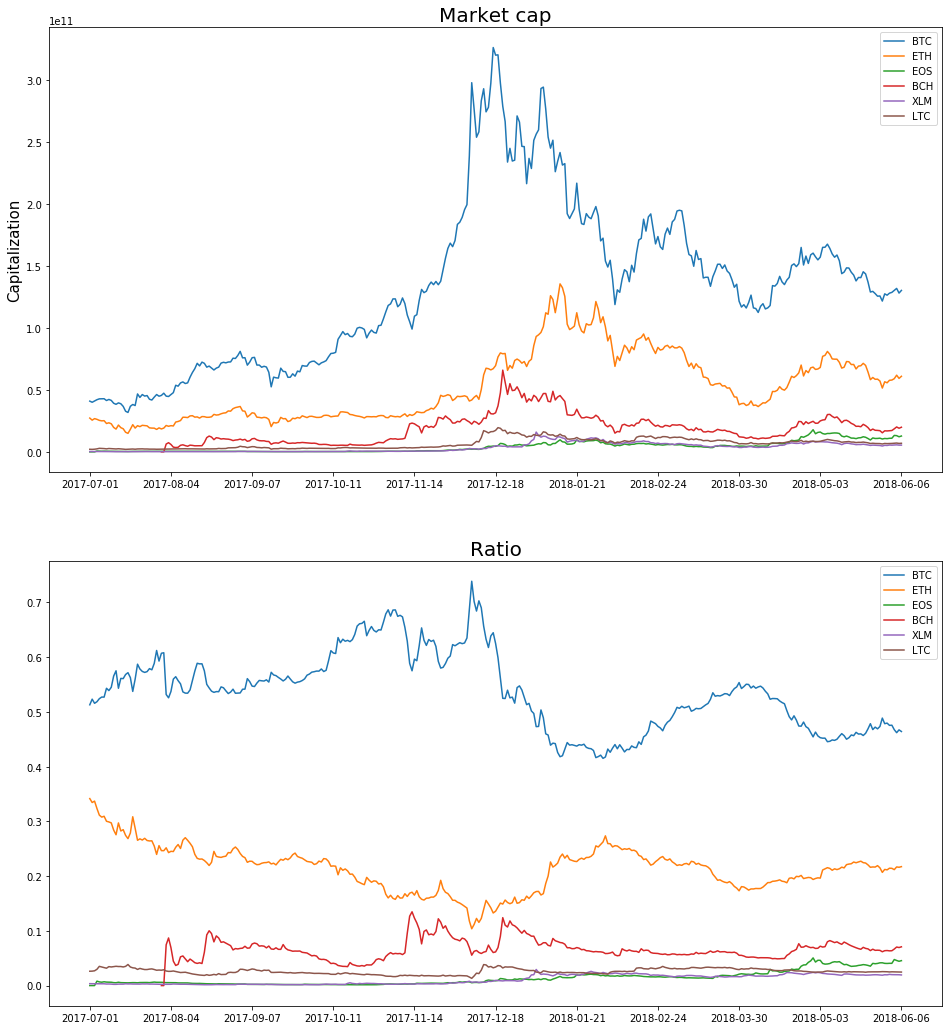

In [136]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

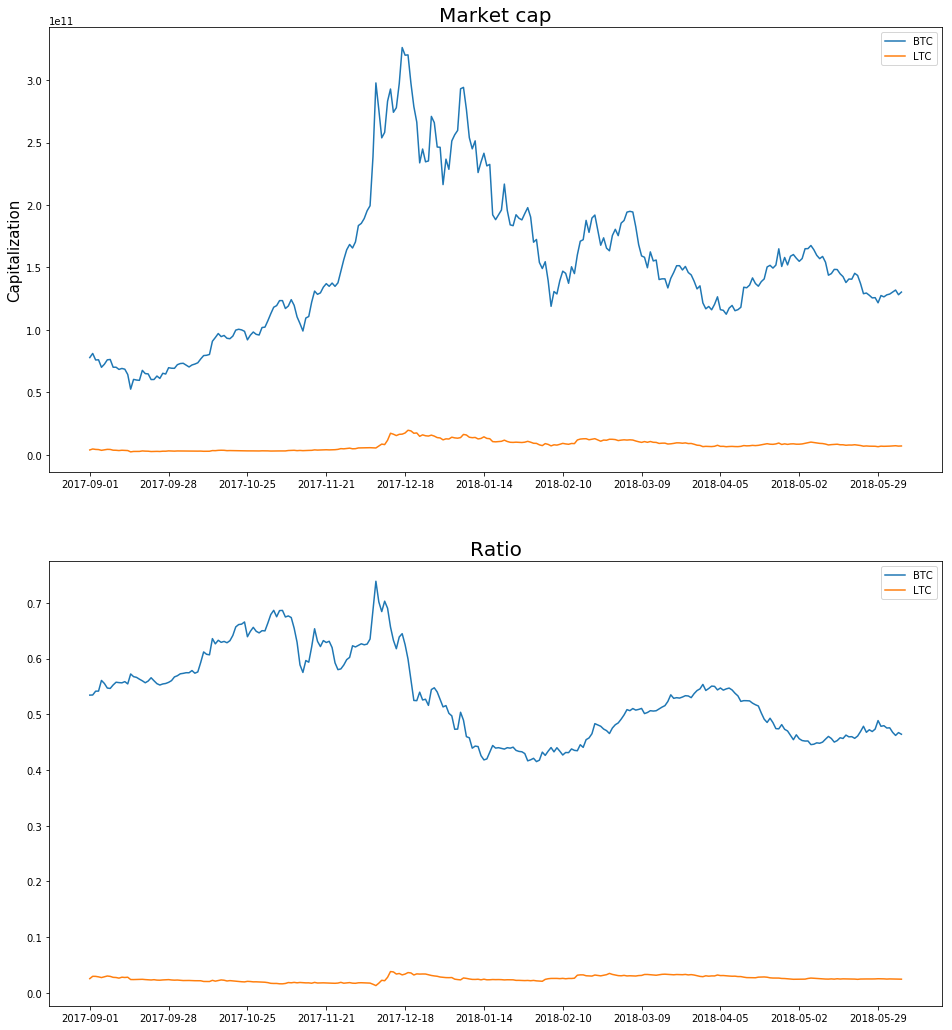

In [137]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'LTC'),
    start_date='2017-09-01'
)

#### Проанализируйте зависимость доли капитализации лайткойнов от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

Зависимость скорее обратная, те при скачке капитализации биткоина, капитализация лайткоина падает.

## 7. Корреляции монет (1 балл)

#### Теперь нужно подробнее посмотреть на корреляции средних капитализаций монет. При этом будем смотреть на среднее сглаженное за последние window дней до дня date с коэффициентом сглаживания alpha для набора монет symbols.  
#### Реализуйте функцию, которая будет возвращать квадратный DataFrame с числом строк и столбцов равным числу рассматриваемых монет и со значениями корреляций.

In [138]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
    
    data = coins[str(pd.Timestamp(date) - pd.Timedelta('{} days'.format(window)).round('D'))[:10]:date]
    
    sorted_index = sorted(set(data.index))
    
    res = pd.DataFrame(index=sorted_index)
    
    
    for symbol in symbols:  # Запишем данные
        res[symbol] = data[data['symbol'] == symbol]['market']
    
    
    return res.ewm(alpha=alpha).mean().corr()

In [140]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1,1,0.06,0.99,0.98,1,0.98
ETH,1,1,0.06,0.98,0.96,1,0.98
EOS,0.06,0.06,1,0.088,0.077,0.057,0.15
BCH,0.99,0.98,0.088,1,1,0.99,0.99
XLM,0.98,0.96,0.077,1,1,0.98,0.99
LTC,1,1,0.057,0.99,0.98,1,0.99
ADA,0.98,0.98,0.15,0.99,0.99,0.99,1


In [141]:
calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)

,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.000000,0.996287,0.060045,0.986566,0.977415,0.997022,0.983263
ETH,0.996287,1.000000,0.059907,0.977768,0.964911,0.996208,0.977538
EOS,0.060045,0.059907,1.000000,0.087925,0.077318,0.057175,0.148981
BCH,0.986566,0.977768,0.087925,1.000000,0.996334,0.989714,0.988159
XLM,0.977415,0.964911,0.077318,0.996334,1.000000,0.982167,0.986736
LTC,0.997022,0.996208,0.057175,0.989714,0.982167,1.000000,0.988335
ADA,0.983263,0.977538,0.148981,0.988159,0.986736,0.988335,1.000000


Довольно интересно ещё взглянуть на 2017-12-27:

In [142]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1,0.68,0.61,0.41,0.65,0.78,0.54
ETH,0.68,1,0.99,0.91,0.97,0.98,0.96
EOS,0.61,0.99,1,0.95,0.99,0.94,0.99
BCH,0.41,0.91,0.95,1,0.94,0.82,0.97
XLM,0.65,0.97,0.99,0.94,1,0.93,0.99
LTC,0.78,0.98,0.94,0.82,0.93,1,0.89
ADA,0.54,0.96,0.99,0.97,0.99,0.89,1


## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия основанная на скользящих средних. Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае. Посмотрим на пример

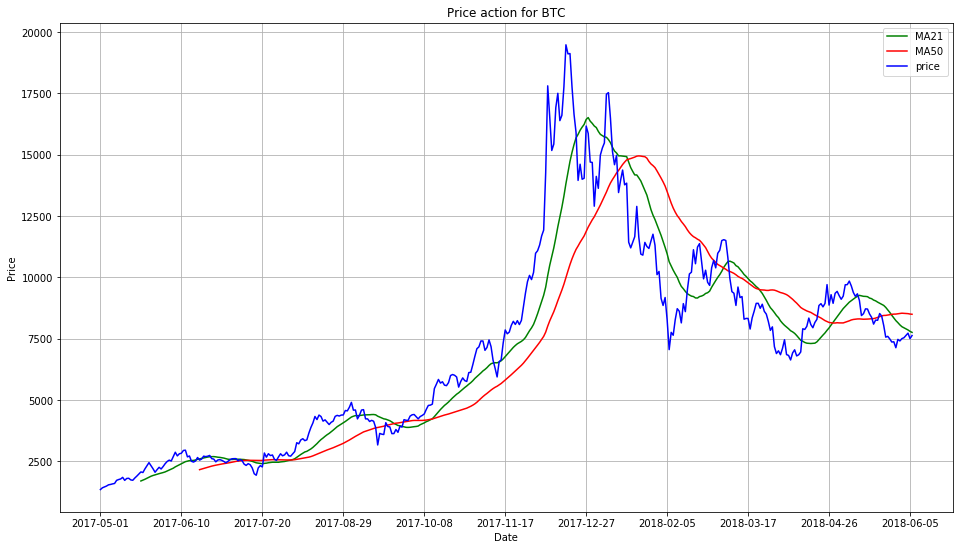

In [143]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)
    
    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    ax.set_xticks(price.index[::len(price.index) // 10])
    plt.show() 

plot_moving_averages(
    coins=coins, 
    symbol='BTC', 
    leading_window=21, 
    lagging_window=50, 
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что для скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия.
#### Реализуйте функцию, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании 

#### Notes:
Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод shift(1) у Series.
Отношение цен закрытия за сегодня и за вчера - это мой multiplier за сегодняшний день. При этом давайте строить графики накопления для multipliers. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй- 0.5 и в третий 2. То график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).

При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый threshold (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [144]:
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):
    coin = coins[coins['symbol'] == symbol][str(start_date)[:10]:str(end_date)[:10]]
    price = coin['close']
    leading_mean = price.rolling(window=lead_window).mean()
    lagging_mean = price.rolling(window=lag_window).mean()

    fig = plt.figure(figsize=(16, 5))
    
    # First plot
    ax = fig.add_subplot(121)
    
    ax.set_title('Price action for {}'.format(symbol))
    
    ax.plot(leading_mean, color='green', label='MA{}'.format(lead_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lag_window))
    
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    ax.set_xticks(price.index[::len(price.index) // 5])
    
    
    # second plot
    profit = 1
    state = 'sell'
    buy_price = 0
    profit = pd.DataFrame(columns=['ratio'])
    
    # Посчитаем прибыль по сложной стратегии
    for day in price.index[lag_window:]:
        if (leading_mean.loc[day] - lagging_mean.loc[day]) / price.loc[day] > threshold and state == 'sell':
            state = 'buy'
            buy_price = price.loc[day]
            print('BUY', buy_price, day)
        elif (leading_mean.loc[day] - lagging_mean.loc[day]) / price.loc[day] < threshold and state == 'buy':
            state = 'sell'
            profit.loc[day] = price.loc[day] / buy_price
            print('Sell', price.loc[day], day)
        elif (day == price.index.max()) and state == 'buy':
            # Продадим акции в последний день, есть они куплены
            state = 'sell'
            profit.loc[day] = price.loc[day] / buy_price
            print('Sell', price.loc[day], day)
            
    profit = profit.cumprod()
    
    # Обычная стратегия
    dele = coins[coins['symbol'] == symbol]['close'].reindex(profit.index)
    
    ax = fig.add_subplot(122)
    
    ax.set_title('Profit')
    
    ax.plot(dele / dele.loc[profit.index.min()], color='green', label='Simple strategy')
    ax.plot(profit, color='red', label='Complex strategy')
    
    ax.set_xlabel('Date')
    ax.set_ylabel('Profit')
    ax.legend(loc='best')
    ax.grid(True)
    ax.set_xticks(profit.index)
    
    plt.show()

In [145]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21, 
    min=1, 
    max=200, 
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1, 
    max=200, 
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0, 
    max=0.20, 
    step=0.001, 
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

interactive(children=(Dropdown(description='symbol', layout=Layout(width='700px'), options=('BTC', 'ETH', 'EOS…

<function __main__.plot_moving_averages_strategy(coins, symbol, lead_window, lag_window, threshold, start_date, end_date)>

#### Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели.

Если график достаточно гладкий, то сложная стратегия проигрывает простой. Но если есть монета имеет высокую волатильность, то 
сложная стратегия приносит хороший результат.

## 9. Отказ от ответственности 
Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.

![Disclamer](https://i0.kym-cdn.com/entries/icons/mobile/000/024/785/Screen_Shot_2017-11-30_at_1.12.37_PM.jpg)